<a href="https://colab.research.google.com/github/LCaravaggio/AnalisisCuantitativoAvanzado/blob/main/MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías

In [74]:
import pandas as pd
import numpy as np
import requests

import matplotlib.pyplot as plt

from sklearn import linear_model

# Capítulo 4

In [38]:
response = requests.get('http://masteringmetrics.com/wp-content/uploads/2015/01/AEJfigs.dta', stream=True, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})

In [39]:
if response.ok:
    file = open('AEJfigs.dta', "wb+") # write, binary, allow creation
    file.write(response.content)
    file.close()
else:
    print("Failed to get the file")

In [40]:
df = pd.read_stata('AEJfigs.dta')

In [43]:
df.head(2)

,agecell,all,allfitted,internal,internalfitted,external,externalfitted,alcohol,alcoholfitted,homicide,homicidefitted,suicide,suicidefitted,mva,mvafitted,drugs,drugsfitted,externalother,externalotherfitted
0,19.068493,92.825401,91.706146,16.617590,16.738131,76.207817,74.968010,0.639138,0.794344,16.316818,16.284573,11.203714,11.592100,35.829327,34.817780,3.872425,3.448835,8.534373,8.388236
1,19.150684,95.100739,91.883720,18.327684,16.920654,76.773056,74.963066,0.677409,0.837575,16.859964,16.270697,12.193368,11.593611,35.639256,34.633888,3.236511,3.470022,8.655786,8.530174


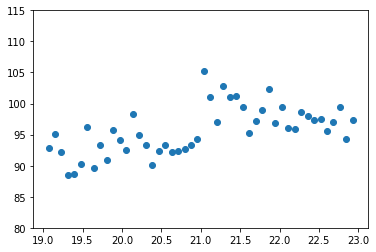

In [52]:
plt.ylim([80, 115])
plt.scatter(df.agecell, df['all'])

In [61]:
df['DA']="0"
df.loc[df['agecell'] >= 21, 'DA'] = 1

In [65]:
df=df.dropna()

In [68]:
vars=['DA', 'agecell']
X = df[vars].values
y = df['all'].values
lr = linear_model.LinearRegression()
lr.fit(X, y)
lr.coef_

array([ 7.66270892, -0.97468427])

In [81]:
pd.options.mode.chained_assignment = None  # default='warn'
df['A2']=0
df['A2']=np.square(df['agecell'])

In [82]:
vars=['DA', 'agecell', 'A2']
X = df[vars].values
y = df['all'].values
lr = linear_model.LinearRegression()
lr.fit(X, y)
lr.coef_

array([ 7.6627157 , 33.40861199, -0.81865001])

# Capítulo 5

In [35]:
response = requests.get('http://masteringmetrics.com/wp-content/uploads/2015/02/banks.csv', stream=True, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})

In [36]:
with open('banks.csv', 'w') as f:
    writer = csv.writer(f)
    for line in response.iter_lines():
        writer.writerow(line.decode('utf-8').split(','))

In [37]:
pd.read_csv('/content/banks.csv')

,date,weekday,day,month,year,bib6,bio6,bib8,bio8
0,10775.0,Monday,1.0,7.0,1929.0,141.0,141.0,169.0,169.0
1,10776.0,Tuesday,2.0,7.0,1929.0,141.0,141.0,169.0,169.0
2,10777.0,Wednesday,3.0,7.0,1929.0,141.0,141.0,169.0,169.0
3,10778.0,Thursday,4.0,7.0,1929.0,141.0,141.0,169.0,169.0
4,10779.0,Friday,5.0,7.0,1929.0,141.0,141.0,169.0,169.0
...,...,...,...,...,...,...,...,...,...
1879,12648.0,Friday,17.0,8.0,1934.0,102.0,103.0,109.0,108.0
1880,12649.0,Saturday,18.0,8.0,1934.0,102.0,103.0,109.0,108.0
1881,12650.0,Sunday,19.0,8.0,1934.0,102.0,103.0,109.0,108.0
1882,12651.0,Monday,20.0,8.0,1934.0,102.0,103.0,109.0,108.0
